In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
df = pd.read_json('./data.json', orient='records')
df

,_id,createdAt,customer,eventCategory,eventName,eventValue
0,5a1f93371efd4c903f000002,2017-11-28T19:47:40.952Z,5a1f93371efd4c903f000001,pageloads,page-loaded,about-us
1,5a1f93371efd4c903f000003,2017-11-28T19:47:40.967Z,5a1f93371efd4c903f000001,data-entry,phone-entered,1-116-561-9826 x1374
2,5a1f93371efd4c903f000004,2017-11-28T19:47:42.967Z,5a1f93371efd4c903f000001,pageloads,page-unloaded,about-us
3,5a1f93371efd4c903f000006,2017-11-21T21:10:10.955Z,5a1f93371efd4c903f000005,pageloads,page-loaded,about-us
4,5a1f93371efd4c903f000007,2017-11-21T21:10:14.955Z,5a1f93371efd4c903f000005,data-entry,email-entered,Beatrice93@yahoo.com
5,5a1f93371efd4c903f000008,2017-11-21T21:10:14.975Z,5a1f93371efd4c903f000005,data-entry,phone-entered,393.696.1561
6,5a1f93371efd4c903f000009,2017-11-21T21:10:57.975Z,5a1f93371efd4c903f000005,pageloads,page-unloaded,about-us
7,5a1f93371efd4c903f00000b,2017-11-21T22:30:56.957Z,5a1f93371efd4c903f00000a,pageloads,page-loaded,about-us
8,5a1f93371efd4c903f00000c,2017-11-21T22:31:13.957Z,5a1f93371efd4c903f00000a,data-entry,email-entered,Aurelia87@yahoo.com
9,5a1f93371efd4c903f00000d,2017-11-21T22:31:13.977Z,5a1f93371efd4c903f00000a,data-entry,phone-entered,529-285-0746 x6509


In [3]:
df['eventCategory'].value_counts()

data-entry         20014
pageloads          20000
form-submission     6021
Name: eventCategory, dtype: int64

(array([  999.,     0.,  1887.,     0.,     0.,   800.,     0.,  2708.,
            0.,  3606.]),
 array([ 2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4,  4.8,  5.2,  5.6,  6. ]),
 <a list of 10 Patch objects>)

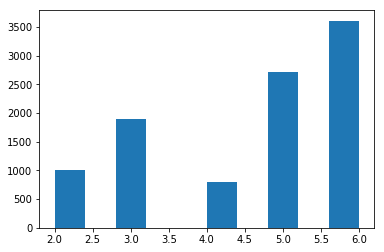

In [4]:
plt.hist(df['customer'].value_counts())

(array([ 7508.,     0.,     0.,  6021.,     0.,     0.,  5989.,     0.,
            0.,  6517.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

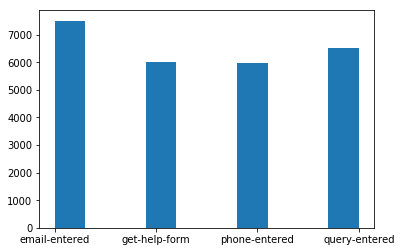

In [4]:
df_events = df[(df['eventCategory'] == 'data-entry') | (df['eventCategory'] == 'form-submission')]
plt.hist(df_events['eventName'])

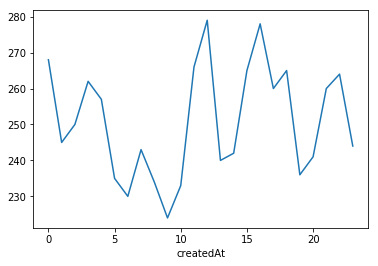

In [5]:
df_landing = df[df['eventName'] == 'get-help-form']
landing_idx = pd.DatetimeIndex(df_landing['createdAt'])
df_landing.groupby([landing_idx.hour])['createdAt'].count().plot()

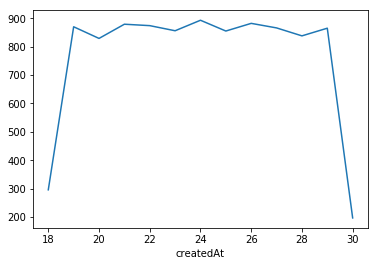

In [7]:
df_landing.groupby([landing_idx.day])['createdAt'].count().plot()

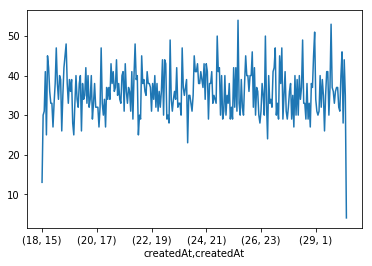

In [8]:
df_landing.groupby([landing_idx.day, landing_idx.hour])['createdAt'].count().plot()

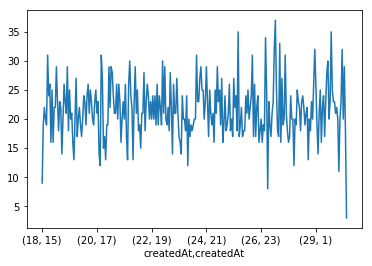

In [9]:
def plot_event_dist(event_name):
    df_times = df[df['eventName'] == event_name]
    times_idx = pd.DatetimeIndex(df_times['createdAt'])
    df_times.groupby([times_idx.day, times_idx.hour])['createdAt'].count().plot()
    
plot_event_dist('get-help-form')

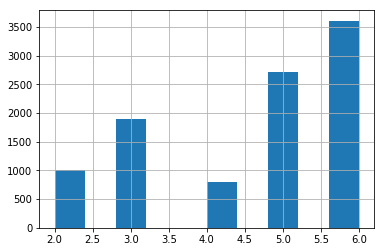

In [10]:
df.groupby('customer')['eventName'].count().hist()

In [11]:
df[df['eventName'] == 'get-help-form']['_id'].count()

6021

In [12]:
df[df['eventName'] == 'email-entered']['eventValue'].count()

7508

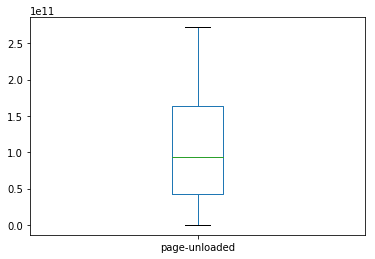

In [13]:
parse = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ')
pivot_df = df[df['eventCategory'] == 'pageloads'].pivot(index='customer', columns='eventName', values='createdAt')
pivot_df.loc[:, 'page-unloaded'] = pivot_df.loc[:, 'page-unloaded'].apply(parse)
pivot_df.loc[:, 'page-loaded'] = pivot_df.loc[:, 'page-loaded'].apply(parse)
pivot_df.loc[:, 'page-unloaded'] = pivot_df.loc[:, 'page-unloaded'] - pivot_df.loc[:, 'page-loaded']
pivot_df.loc[:, 'page-unloaded'].plot(kind='box')

In [12]:
pivot_df2 = df.pivot(index='customer', columns='eventName', values='createdAt')
pivot_df2

eventName,email-entered,get-help-form,page-loaded,page-unloaded,phone-entered,query-entered
customer,,,,,,
5a1f93371efd4c903f000001,None,None,2017-11-28T19:47:40.952Z,2017-11-28T19:47:42.967Z,2017-11-28T19:47:40.967Z,None
5a1f93371efd4c903f000005,2017-11-21T21:10:14.955Z,None,2017-11-21T21:10:10.955Z,2017-11-21T21:10:57.975Z,2017-11-21T21:10:14.975Z,None
5a1f93371efd4c903f00000a,2017-11-21T22:31:13.957Z,None,2017-11-21T22:30:56.957Z,2017-11-21T22:31:24.977Z,2017-11-21T22:31:13.977Z,None
5a1f93371efd4c903f00000f,2017-11-29T13:40:29.957Z,2017-11-29T13:42:37.957Z,2017-11-29T13:40:03.957Z,2017-11-29T13:43:02.957Z,None,2017-11-29T13:42:19.957Z
5a1f93371efd4c903f000015,2017-11-25T23:54:04.958Z,2017-11-25T23:55:16.958Z,2017-11-25T23:54:03.958Z,2017-11-25T23:56:13.958Z,None,2017-11-25T23:54:58.958Z
5a1f93371efd4c903f00001b,2017-11-20T02:03:19.958Z,2017-11-20T02:03:31.958Z,2017-11-20T02:02:59.958Z,2017-11-20T02:03:59.958Z,None,2017-11-20T02:03:23.958Z
5a1f93371efd4c903f000021,2017-11-19T17:17:05.959Z,2017-11-19T17:17:23.965Z,2017-11-19T17:17:04.959Z,2017-11-19T17:17:50.965Z,2017-11-19T17:17:05.965Z,2017-11-19T17:17:13.965Z
5a1f93371efd4c903f000028,2017-11-28T16:28:49.959Z,2017-11-28T16:29:48.970Z,2017-11-28T16:28:45.959Z,2017-11-28T16:30:43.970Z,2017-11-28T16:28:49.970Z,2017-11-28T16:29:34.970Z
5a1f93371efd4c903f00002f,None,None,2017-11-29T14:50:16.959Z,2017-11-29T14:50:42.977Z,2017-11-29T14:50:16.977Z,None


In [14]:
pg_unloaded = pivot_df.loc[:, 'page-unloaded'].apply(lambda x: x.seconds)
pg_unloaded.mean()

104.6191

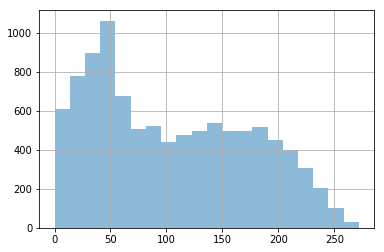

In [15]:
pg_unloaded.hist(bins=20, alpha=0.5)